# 1) Datu ielāde

In [7]:
import pandas as pd
from lvclassify_helpers import getdata10cat
	
data_news = getdata10cat()
data_news.head()

,category,body
0,Sports,Reaģējot uz Latvijas Paralimpiskās komitejas ...
1,Sports,Latvijas tenisiste Jeļena Ostapenko šodien Ķ...
2,Sports,Latvijas Sporta federāciju padome (LSFP) iebi...
3,Sports,Jaunais sporta finansējuma modelis samazinās f...
4,Sports,Aleksandrs un Mihails Samoilovi piektdien S...


# 2) Datu priekšapstrāde

## Izveidojam funkciju datu attīrīšanai - atdalošie simboli, lielie burti, palīgvārdi.

In [8]:
from lvclassify_helpers import getlvstopwords
import string
punct = string.punctuation
stopwords_arr = getlvstopwords()
print(stopwords_arr)

['aiz', 'ap', 'apakš', 'apakšpus', 'ar', 'arī', 'augšpus', 'bet', 'bez', 'bija', 'biji', 'biju', 'bijām', 'bijāt', 'būs', 'būsi', 'būsiet', 'būsim', 'būt', 'būšu', 'caur', 'diemžēl', 'diezin', 'droši', 'dēļ', 'esam', 'esat', 'esi', 'esmu', 'gan', 'gar', 'iekam', 'iekams', 'iekām', 'iekāms', 'iekš', 'iekšpus', 'ik', 'ir', 'it', 'itin', 'iz', 'ja', 'jau', 'jeb', 'jebšu', 'jel', 'jo', 'jā', 'ka', 'kamēr', 'kaut', 'kolīdz', 'kopš', 'kā', 'kļuva', 'kļuvi', 'kļuvu', 'kļuvām', 'kļuvāt', 'kļūs', 'kļūsi', 'kļūsiet', 'kļūsim', 'kļūst', 'kļūstam', 'kļūstat', 'kļūsti', 'kļūstu', 'kļūt', 'kļūšu', 'labad', 'lai', 'lejpus', 'līdz', 'līdzko', 'ne', 'nebūt', 'nedz', 'nekā', 'nevis', 'nezin', 'no', 'nu', 'nē', 'otrpus', 'pa', 'par', 'pat', 'pie', 'pirms', 'pret', 'priekš', 'pār', 'pēc', 'starp', 'tad', 'tak', 'tapi', 'taps', 'tapsi', 'tapsiet', 'tapsim', 'tapt', 'tapāt', 'tapšu', 'taču', 'te', 'tiec', 'tiek', 'tiekam', 'tiekat', 'tieku', 'tik', 'tika', 'tikai', 'tiki', 'tikko', 'tiklab', 'tiklīdz', 'tik

In [9]:
import spacy
!python -m spacy download xx_ent_wiki_sm
nlp = spacy.load("xx_ent_wiki_sm")

def datu_prieksapstrade(raksts):
  doc = nlp(raksts)
  tokens = []
  for token in doc:
    temp = token.lower_
    tokens.append(temp)

  cleaned_tokens = []
  for token in tokens:
    if token not in stopwords_arr and token not in punct:
      cleaned_tokens.append(token)
  return cleaned_tokens

     ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
     --------------------------------------- 0.0/11.1 MB 187.9 kB/s eta 0:00:59
     --------------------------------------- 0.0/11.1 MB 217.9 kB/s eta 0:00:51
     --------------------------------------- 0.1/11.1 MB 353.1 kB/s eta 0:00:32
     --------------------------------------- 0.1/11.1 MB 481.4 kB/s eta 0:00:23
     --------------------------------------- 0.1/11.1 MB 481.4 kB/s eta 0:00:23
      -------------------------------------- 0.1/11.1 MB 405.9 kB/s eta 0:00:27
      -------------------------------------- 0.2/11.1 MB 419.0 kB/s eta 0:00:27
      -------------------------------------- 0.2/11.1 MB 419.0 kB/s eta 0:00:27
      -------------------------------------- 0.2/11.1 MB 371.2 kB/s eta 0:00:30
      -------------------------------------- 0.2/11.1 MB 371.2 k


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
datu_prieksapstrade("""Visvairāk atļauju (41) plānots anulēt uzņēmumam "Alfor", kam seko "Olympic Casino Latvia" ar 36 atļaujām.""")

['visvairāk',
 'atļauju',
 '41',
 'plānots',
 'anulēt',
 'uzņēmumam',
 'alfor',
 'kam',
 'seko',
 'olympic',
 'casino',
 'latvia',
 '36',
 'atļaujām']

In [11]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

# Dažādi vektorizācijas varianti
tfidf = TfidfVectorizer(tokenizer=datu_prieksapstrade)
count_vec = CountVectorizer(tokenizer=datu_prieksapstrade) # Countvectorizer kā BOW
count_vec_ngram = CountVectorizer(tokenizer=datu_prieksapstrade, ngram_range=(1,2)) # BOW ar ngrammām, Bag of bigrams

# 3) Modeļu apmācība / novērtēšana

## Sadalam datus 80/20

In [13]:
from sklearn.model_selection import train_test_split
x = data_news['body']
y = data_news['category']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=42)
x_train.shape, x_test.shape
# 9600 apmācības dati un 2400 testa dati

((9600,), (2400,))

## Apmācības process, statistika, pārbaudes ar piemēriem

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from pathlib import Path
import pickle


def fitKlasifikatoram(vectorizer, classifier):
	clf = Pipeline([('vectorizer',vectorizer), ('classifier',classifier)])
	clf.fit(x_train, y_train)
	return clf

def metrikasIzvade(clf, title, test_vector):
	y_pred = clf.predict(test_vector)
	cm = confusion_matrix(y_test, y_pred)
	accuracy_4dig = round(accuracy_score(y_test, y_pred), 4)
	plot = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
	plot.plot(xticks_rotation=90)
	plot.ax_.set_title(title)
	print(classification_report(y_test, y_pred, digits=3))
	#Saglabājam cik veiksmīga bijusi klasifikācija, tabulu tālāk liksim iekš darba
	clsf_report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred, output_dict=True)).transpose()
	filenameCsv = title + '_'+ str(accuracy_4dig) + '.csv'
	filenamePickle= title + '_'+ str(accuracy_4dig) + '.sav'
	clsf_report.to_csv(Path(".") / 'metrics' / filenameCsv, index= True)
	#Saglabājam modeli
	with open(Path(".") / 'models' / filenamePickle, 'wb') as f:
		pickle.dump(clf, f)

def fitArMetrikasIzvadi(vectorizer, classifier, title):
	clf = fitKlasifikatoram(vectorizer, classifier)
	metrikasIzvade(clf, title, x_test)

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta      0.992     0.996     0.994       240
         Auto      0.983     0.979     0.981       240
     Finanses      0.957     0.925     0.941       240
         Kino      0.988     0.988     0.988       240
Kriminālziņas      0.992     0.988     0.990       240
   Literatūra      0.979     0.979     0.979       240
       Mūzika      0.979     0.983     0.981       240
     Politika      0.971     0.967     0.969       240
       Sports      0.980     1.000     0.990       240
 Tehnoloģijas      0.918     0.933     0.926       240

     accuracy                          0.974      2400
    macro avg      0.974     0.974     0.974      2400
 weighted avg      0.974     0.974     0.974      2400



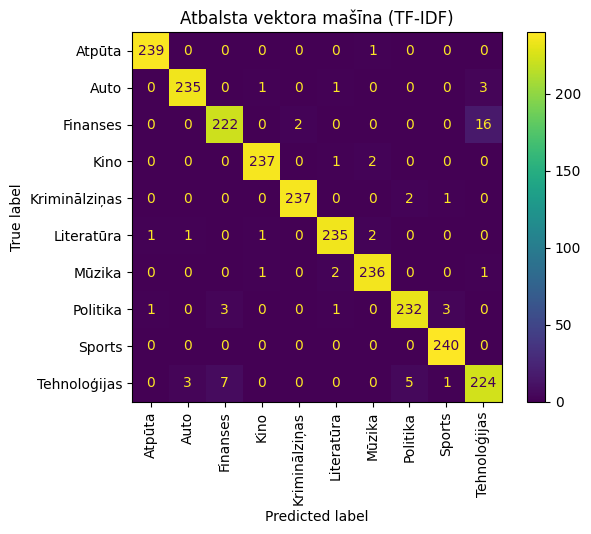

In [15]:
fitArMetrikasIzvadi(tfidf, LinearSVC(), "Atbalsta vektora mašīna (TF-IDF)")

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta      0.937     0.996     0.966       240
         Auto      0.987     0.975     0.981       240
     Finanses      0.951     0.896     0.923       240
         Kino      0.976     0.996     0.986       240
Kriminālziņas      0.955     0.983     0.969       240
   Literatūra      0.987     0.954     0.970       240
       Mūzika      0.983     0.983     0.983       240
     Politika      0.924     0.967     0.945       240
       Sports      0.996     0.954     0.974       240
 Tehnoloģijas      0.924     0.912     0.918       240

     accuracy                          0.962      2400
    macro avg      0.962     0.962     0.962      2400
 weighted avg      0.962     0.962     0.962      2400



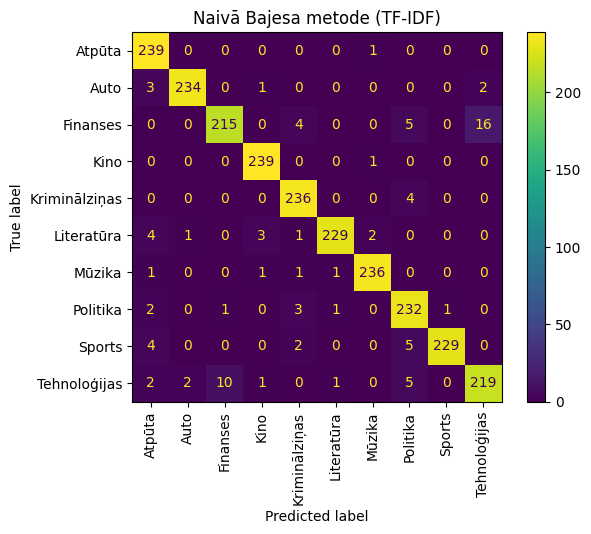

In [16]:
fitArMetrikasIzvadi(tfidf, MultinomialNB(), "Naivā Bajesa metode (TF-IDF)")

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta      0.984     0.996     0.990       240
         Auto      0.988     0.988     0.988       240
     Finanses      0.943     0.900     0.921       240
         Kino      0.991     0.967     0.979       240
Kriminālziņas      0.979     0.979     0.979       240
   Literatūra      0.971     0.971     0.971       240
       Mūzika      0.967     0.983     0.975       240
     Politika      0.954     0.950     0.952       240
       Sports      0.980     0.996     0.988       240
 Tehnoloģijas      0.907     0.933     0.920       240

     accuracy                          0.966      2400
    macro avg      0.966     0.966     0.966      2400
 weighted avg      0.966     0.966     0.966      2400



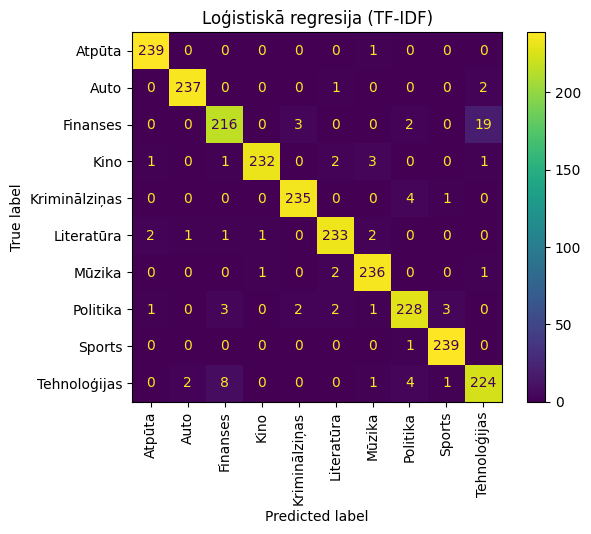

In [17]:
fitArMetrikasIzvadi(tfidf, LogisticRegression(), "Loģistiskā regresija (TF-IDF)")

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta      0.721     0.808     0.762       240
         Auto      0.806     0.833     0.820       240
     Finanses      0.699     0.792     0.742       240
         Kino      0.939     0.900     0.919       240
Kriminālziņas      0.868     0.846     0.857       240
   Literatūra      0.833     0.829     0.831       240
       Mūzika      0.846     0.804     0.825       240
     Politika      0.764     0.742     0.753       240
       Sports      0.852     0.812     0.832       240
 Tehnoloģijas      0.670     0.608     0.638       240

     accuracy                          0.797      2400
    macro avg      0.800     0.797     0.798      2400
 weighted avg      0.800     0.797     0.798      2400



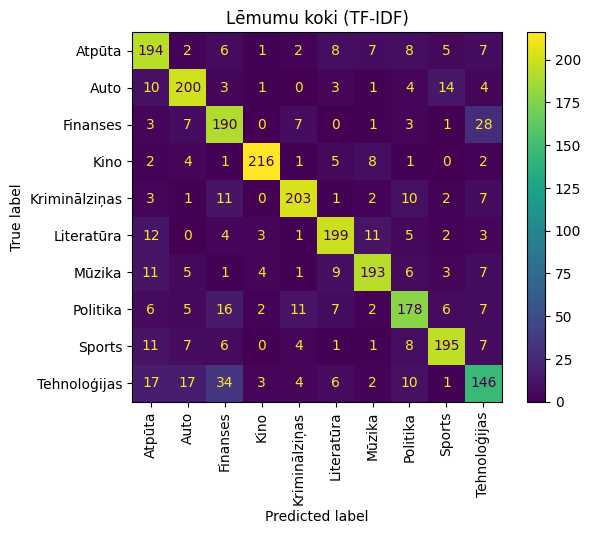

In [18]:
fitArMetrikasIzvadi(tfidf, DecisionTreeClassifier(), "Lēmumu koki (TF-IDF)")

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta      0.983     0.983     0.983       240
         Auto      0.971     0.983     0.977       240
     Finanses      0.965     0.917     0.940       240
         Kino      0.987     0.975     0.981       240
Kriminālziņas      0.988     0.992     0.990       240
   Literatūra      0.971     0.967     0.969       240
       Mūzika      0.959     0.971     0.965       240
     Politika      0.967     0.963     0.965       240
       Sports      0.988     1.000     0.994       240
 Tehnoloģijas      0.919     0.946     0.932       240

     accuracy                          0.970      2400
    macro avg      0.970     0.970     0.970      2400
 weighted avg      0.970     0.970     0.970      2400



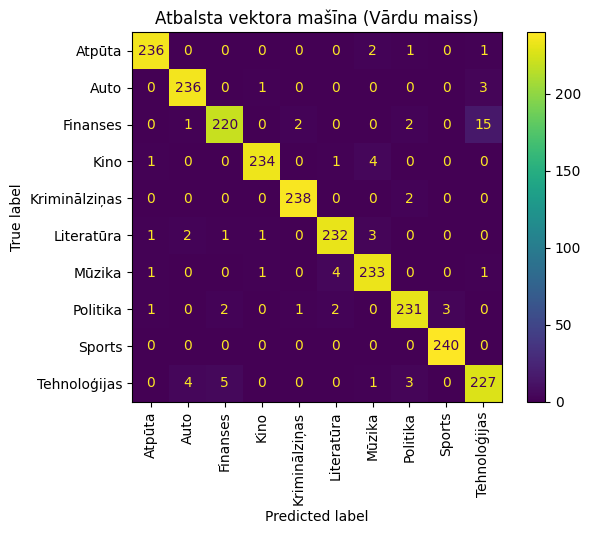

In [19]:
fitArMetrikasIzvadi(count_vec, LinearSVC(), "Atbalsta vektora mašīna (Vārdu maiss)")

c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


c:\Users\Newbox\Documents\Python\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta      0.979     0.988     0.983       240
         Auto      0.979     0.992     0.986       240
     Finanses      0.948     0.908     0.928       240
         Kino      0.992     0.975     0.983       240
Kriminālziņas      0.979     0.992     0.986       240
   Literatūra      0.971     0.967     0.969       240
       Mūzika      0.959     0.971     0.965       240
     Politika      0.962     0.950     0.956       240
       Sports      0.984     1.000     0.992       240
 Tehnoloģijas      0.926     0.938     0.932       240

     accuracy                          0.968      2400
    macro avg      0.968     0.968     0.968      2400
 weighted avg      0.968     0.968     0.968      2400



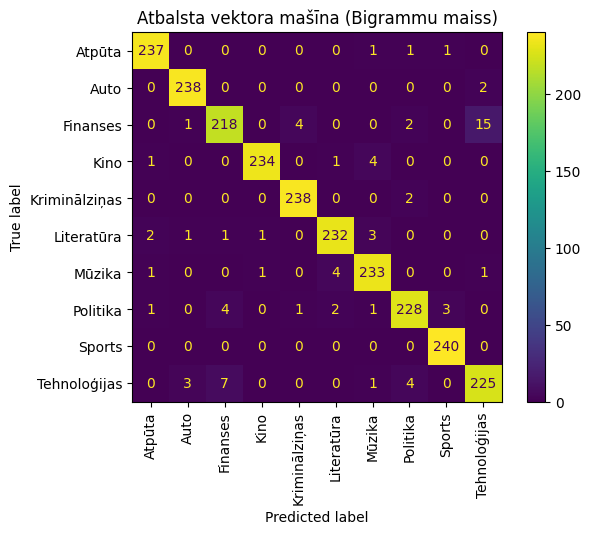

In [20]:
fitArMetrikasIzvadi(count_vec_ngram, LinearSVC(), "Atbalsta vektora mašīna (Bigrammu maiss)")

In [21]:
# # Sporta raksts
# fittedSVC = pickle.load(open("models/Atbalsta vektora mašīna (TF-IDF)_0.9646.sav", 'rb'))
# fittedSVC.predict(["""Latvijas basketbola izlase otrdien Džakartā ar smagu zaudējumu piedzīvoja pirmo zaudējumu Pasaules kausa vēsturē, H grupas pēdējās kārtas spēlē ar 75:101 (23:13, 19:30, 15:24, 18:34) piekāpjoties teicami otro puslaiku aizvadījušajai Kanādai.

# Latvija uzvarēja pirmo ceturtdaļu ar 10 punktu pārsvaru, bet atlikušajās 30 minūtēs piekāpās ar 52:88. Pēc pirmā puslaika Latvijai bija viena punkta deficīts, bet otro puslaiku Latvija zaudēja ar 33:58."""])

In [22]:
# # Politikas raksts
# fittedSVC.predict(["""Lēmumi par kontrolpunktu slēgšanu uz Lietuvas robežas ar Baltkrieviju tiks pieņemti, ja tiks konstatēts apdraudējums, kas atbildīs kritērijiem, ko noteiks starpinstitūciju darba grupa, otrdien paziņoja Lietuvas iekšlietu viceministrs Vitālijs Dmitrijevs.

# "Vienojāmies, ka, lai turpinātu slēgt robežkontroles punktus vai ierobežotu to darbību, nosakot noteiktas stundas, lai kontrolpunkts, piemēram, strādātu līdz pulksten 20 vai pulksten 18, acīmredzot ir nepieciešams visu kopīgs viedoklis," pēc vairāku ministriju, robežsardzes un citu dienestu pārstāvju tikšanās aģentūrai BNS sacīja Dmitrijevs."""])

# Word 2 Vec vektorizācija priekšapstrādē

In [23]:
from gensim.models import Word2Vec
import numpy as np

x_train_w2v= x_train.apply(datu_prieksapstrade)
x_test_w2v= x_test.apply(datu_prieksapstrade)

w2v_model = Word2Vec(x_train_w2v, vector_size=200, window=5, min_count=5, workers=4)
def vectorize(teksts):
    vardu_vekt = [w2v_model.wv[vards] for vards in teksts if vards in w2v_model.wv]
    if len(vardu_vekt) == 0:
        return np.zeros(100)
    vardu_vekt = np.array(vardu_vekt)
    return vardu_vekt.mean(axis=0)


x_train_w2v = np.array([vectorize(teksts) for teksts in x_train_w2v])
x_test_w2v = np.array([vectorize(teksts) for teksts in x_test_w2v])

clfNew = LinearSVC()
clfNew.fit(x_train_w2v, y_train)
        
metrikasIzvade(clfNew, "Atbalsta vektora mašīna (Word2Vec)", x_test_w2v)

ModuleNotFoundError: No module named 'gensim'